In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Path to ATom MER-WAS_DC8*.ict files on your computer
p = Path('../external_data/ATom')
# It seems that ATom files are periodically revised, so file names change after revision
headers = [541, 541, 540, 540, 530, 538, 537, 518, 538, 521, 499, 457, 454, 450, 462, 461, 461, 461, 461, 458, 452, 446]
# one_file = 'MER-WAS_DC8_20170221_R9.ict'
# path_to_file = p / one_file

In [3]:
list_of_dfs = []
for i, j in zip(sorted(p.glob('*.ict')), headers):
    list_of_dfs.append(pd.read_csv(i, sep=',', header=j, na_values=-99999))
combo_df = pd.concat(list_of_dfs, sort=False)

In [ ]:
# OXBUDS variables
# O3_UO3, UCATS OZONE MIXING RATIO (PPB)
# CH4_PECD, DRY MOLE FRACTION MIXING RATIO  (PPB)
# Ethane_WAS, pptv
# Propane_WAS, pptv
# n-Butane_WAS, pptv
# i-Butane_WAS, pptv
# n-Pentane_WAS, pptv
# i-Pentane_WAS, pptv
# MeONO2_WAS, pptv
# EtONO2_WAS, pptv
# n-PrONO2_WAS, pptv
# i-PrONO2_WAS, pptv
# 2-BuONO2_WAS, pptv
# 3-PenONO2_WAS, pptv
# 2-PenONO2_WAS, pptv
# 3-Methyl-2-BuONO2_WAS, pptv

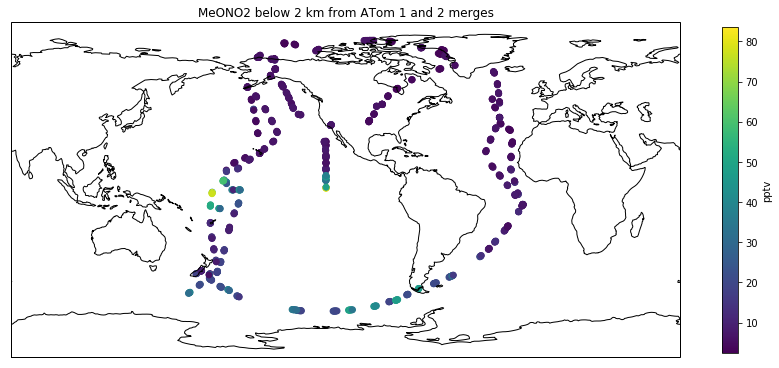

In [32]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=250)), facecolor='w')
ax.coastlines();
ax.set_global();
# ax.set_extent([-180,0, -90, 90], crs=ccrs.PlateCarree());
# ax.scatter(combo_df.G_LONG, combo_df.G_LAT, c=combo_df.G_ALT, cmap='viridis', transform=ccrs.PlateCarree());
p1 = ax.scatter(combo_df.G_LONG[combo_df.G_ALT<2000], combo_df.G_LAT[combo_df.G_ALT<2000], 
                c=combo_df['MeONO2_WAS'][combo_df.G_ALT<2000],
                cmap='viridis', transform=ccrs.PlateCarree());
fig.colorbar(p1, shrink=0.4, label='pptv');
ax.set_title('MeONO2 below 2 km from ATom 1 and 2 merges');